In [1]:
import tensorflow as tf
hello = tf.constant('Hello, World')
sess = tf.Session()
print(sess.run(hello))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, World'


In [2]:
print("This is a basic tensor tutorial of TensorFlow from DataCamp: https://www.datacamp.com/community/tutorials/tensorflow-tutorial")

This is a basic tensor tutorial of TensorFlow from DataCamp: https://www.datacamp.com/community/tutorials/tensorflow-tutorial


In [3]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])
#Existen dos tipos mas de valores aparte de las constantes, que son los placeholders y las variables.
#Los Placeholders son valores que no estan asignados y que seran inicializados cuando se ejecute la sesion.
#el tipo placeholder viene a ser como un marcador de posicion para un tensor que es inicializado por la sesion cuando
#esta se ejecuta
#Por otro lado, esta el tipo "variable", que son valores que se pueden modificar,y las constantes son constantes -_-!
# Multiply
result = tf.multiply(x1, x2)

pantalla1 = tf.constant(["Opcion 1:"], tf.string)
pantalla2 = tf.Variable(["Opcion 2:"], tf.string)
# Print the result
print(result)
print(pantalla1)
print(pantalla2)
#Por pantalla se muestra un tensor abstracto en el "computational graph", pero la operación no se ha ejecutado, 
#se ha definido el modelo. TensorFlow sigue el modelo "lazy evaluation" o evaluacion perezosa

Instructions for updating:
Colocations handled automatically by placer.
Tensor("Mul:0", shape=(4,), dtype=int32)
Tensor("Const_3:0", shape=(1,), dtype=string)
<tf.Variable 'Variable:0' shape=(1,) dtype=string_ref>


In [4]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

pantalla1 = tf.constant(["Opcion 1:"], tf.string)
pantalla2 = tf.constant(["Opcion 2:"], tf.string)
pantalla1 = tf.constant(["Opcion buba:"], tf.string)

#Para mostrar el resultado del tensor, debemos de inicializar o ejecutar la sesion. Existen dos maneras. Una debemos de 
#cerrarla nosotros, y otra se cierra automaticamente al ejecutarse la ultima linea que contiene. Aunque en el tutorial 
#de datacamp son dos ejecuciones diferentes, y la sesion es cerrada, ejecutare aqui ambas opciones.

############Opcion 1########
#Debemos de cerrar nosotros la sesion
# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(pantalla1))
print(sess.run(result))
# Close the session
sess.close()

###########Opcion 2##########
#La sesion se cierra automaticamente

# Initialize Session and run `result`
with tf.Session() as sess:
    #Nota aqui no podemos hacer lo siguiente:
#     pantalla = sess.run(pantalla2)
#     print(pantalla)
    #Esto da un fallo, porque la variable no ha sido inicializada. Las variables en tensorflow deben de ser inicialiadas
    #antes de poder usarlas, para ello, tenemos dos opciones, o inicializar una variable solo(o conjunto de variables)
    #o inicializar directamente todas las variables, aunque he probado no me ha salido, asi que se vera mas adelante
    pantalla = sess.run(pantalla2)
    print(pantalla)
    print(sess.run(pantalla2))
    output = sess.run(result)
    print(output)

[b'Opcion buba:']
[ 5 12 21 32]
[b'Opcion 2:']
[b'Opcion 2:']
[ 5 12 21 32]


In [5]:
#En los ejemplos anteriores, hemos definido una sesion predeterminada, pero a una sesion tambien se le pueden pasar
#opciones de configuracion
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(result))
# sess.close()
# # Initialize Session and run `result`
# with tf.Session() as sess:
#     config=tf.ConfigProto(log_device_placement=True)
#     output = sess.run(result)
#     print(output)
# #     print(config)


[ 5 12 21 32]


In [6]:
#This part is from official tensorflow page: 
# https://www.tensorflow.org/guide/using_gpu

# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))
#We should be something similar to:
##### Device mapping:
##### /job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K40c, pci bus
##### id: 0000:05:00.0
##### b: /job:localhost/replica:0/task:0/device:GPU:0
##### a: /job:localhost/replica:0/task:0/device:GPU:0
##### MatMul: /job:localhost/replica:0/task:0/device:GPU:0
##### [[ 22.  28.]
#####  [ 49.  64.]]
# But this not works for me.


[[22. 28.]
 [49. 64.]]


In [7]:
#Other way to see info from run and CPU device executer
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session()

# Runs the op.
options = tf.RunOptions(output_partition_graphs=True)
metadata = tf.RunMetadata()
c_val = sess.run(c, options=options, run_metadata=metadata)

print(metadata.partition_graphs)

[node {
  name: "MatMul_1"
  op: "Const"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\260A\000\000\340A\000\000DB\000\000\200B"
      }
    }
  }
  experimental_debug_info {
    original_node_names: "MatMul_1"
  }
}
node {
  name: "_retval_MatMul_1_0_0"
  op: "_Retval"
  input: "MatMul_1"
  device: "/job:localhost/replica:0/task:0/device:CPU:0"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "index"
    value {
      i: 0
    }
  }
  experimental_debug_info {
    original_node_names: "_retval_MatMul_1_0_0"
  }
}
library {
}
versions {
  producer: 27
}
]


In [8]:
############################ BELGIAN TRAFFIC SIGNS ##########################################
print("This is a tutorial of neural network with TrafficSigns from DataCamp in tensorflow:")
print("https://www.datacamp.com/community/tutorials/tensorflow-tutorial")

This is a tutorial of neural network with TrafficSigns from DataCamp in tensorflow:
https://www.datacamp.com/community/tutorials/tensorflow-tutorial


In [9]:
# Download files to use in this tutorial
# Training and testing datasets
# https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
# https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
########## IMPORTS TO THIS BELGIAN TRAFFIC SIGNS TUTORIAL ######
#Import tensorflow
# import tensorflow as tf
import skimage
#Import the `transform` module from `skimage`
# Problems with version, we should do "pip install --upgrade scikit-image" in anaconda promt in order to upgrade packages
from skimage import transform
#scikit-image is an image processing Python package that works with numpy arrays. 
#The package is imported as skimage:
#import skimage
# Most functions of skimage are found within submodules:
from skimage import data
# Import the `pyplot` module to paint graphs
import matplotlib.pyplot as plt
#El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo. 
#Sobre todo, aquellas que nos refieren información sobre el entorno del mismo y nos permiten manipular 
#la estructura de directorios (para leer y escribir archivos)
import os
#Numpy
import numpy as np
# Convert to grayscale
from skimage.color import rgb2gray
import random
# import sys
# print(sys.path)

In [10]:
#Function to load_data
#Note: You’ll see that the testing, as well as the training data folders, contain 61 subfolders,
#which are the 62 types of traffic signs that you’ll use for classification in this tutorial. 
#Additionally, you’ll find that the files have the file extension .ppm or Portable Pixmap Format.
#We pass the train_data_directory to the function.
def load_data(data_directory):
    
    #if we find something in the train_data_directory , check if this is a directory and if it is one, 
    # we will add to our list"directories"
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    #Inicialize two list, labels and images
    labels = []
    images = []
    #Loop through the subdirectories
    #for each subdirectories
    for d in directories:
        #each subdirectory represents a label, then we save the label_directory
        label_directory = os.path.join(data_directory, d)
        #we save each names of files in subdirectorie in a list
        file_names = [os.path.join(label_directory, f) 
                      #for each "something"
                      for f in os.listdir(label_directory) 
                      #check if is a file with extension .ppm (a image)
                      if f.endswith(".ppm")]
        #we loop through the names of files
        for f in file_names:
#             print(file_names)
#             print(f)
            #append image with label image
            images.append(skimage.data.imread(f))
            #d is a name of subdirectory and each name of subdirectory is a label
            labels.append(int(d))
    return images, labels

#Stablished ROOT_PATH to images folders.
ROOT_PATH = "C:/Users/Al_ko/Tutorial DataCamp"
#with os.path.join we can add the specific paths to our ROOT_PATH
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")
#Load images and labels from train_data_directory
images, labels = load_data(train_data_directory)

In [11]:
#Note that the images and labels variables are lists, we need use np.array() 
#to conver list into array. Then we can use ndim and size method on array variable.

# Print the `images` dimensions
print("Number images dimensions:",np.array(images).ndim )

# Print the number of `images`'s elements
print("Number of images elements:",np.array(images).size)

# Print the first instance of `images`
#Note that the images[0] that you printed out is, in fact, one single image that is represented by arrays in arrays! 
#This might seem counterintuitive at first, but it’s something that you’ll get used to as you go further 
#into working with images in machine learning or deep learning applications.
#tensor range 3?

#Print the image [0]
print("Show images[0]:")
print(images[0])
#Print flags from the image [0]
print("show flags from images[0]")
print(images[0].flags)
# print num items from image[0]?
print("Show size of images[0]", images[0].itemsize)
# print bytes from the image [0]
print("Bytes from images[0]")
print(images[0].nbytes)

Number images dimensions: 1
Number of images elements: 4575
Show images[0]:
[[[210 249 232]
  [204 249 208]
  [197 198 155]
  ...
  [ 51  60  40]
  [ 54  64  44]
  [ 57  66  46]]

 [[209 250 236]
  [212 255 217]
  [200 196 156]
  ...
  [ 49  57  38]
  [ 51  59  41]
  [ 53  60  42]]

 [[203 246 236]
  [207 246 213]
  [202 192 156]
  ...
  [ 47  53  35]
  [ 48  54  36]
  [ 48  55  37]]

 ...

 [[  2  22  25]
  [ 26  56  77]
  [ 71 140 159]
  ...
  [ 84  77  50]
  [ 68  66  41]
  [ 56  64  44]]

 [[  0  22  32]
  [ 30  75 106]
  [ 87 176 198]
  ...
  [ 86  80  52]
  [ 68  66  41]
  [ 55  63  42]]

 [[  0  32  50]
  [ 42 101 135]
  [121 217 239]
  ...
  [ 87  80  52]
  [ 70  68  43]
  [ 58  66  46]]]
show flags from images[0]
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
Show size of images[0] 1
Bytes from images[0]
60066


In [12]:
# Print the `labels` dimensions
print("Number of labels dimensions:",np.array(labels).ndim)

# Print the number of `labels`'s elements
print("Number of labels elements:",np.array(labels).size)

# Count the number of labels
print("Count number of different labels:",len(set(labels)))

Number of labels dimensions: 1
Number of labels elements: 4575
Count number of different labels: 62


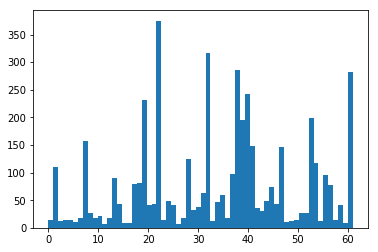

In [13]:
# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

#You clearly see that not all types of traffic signs are equally represented in the dataset. 
#This is something that you’ll deal with later when you’re manipulating the data before you start modeling your neural network.

#At first sight, you see that there are labels that are more heavily present in the dataset than others: 
#the labels 22, 32, 38, and 61 definitely jump out. At this point, it’s nice to keep this in mind, 
#but you’ll definitely go further into this in the next section!

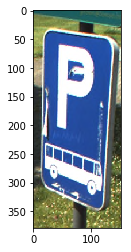

In [14]:
#To plot only a img with plt.imgshow(image)
plt.imshow(images[3650])

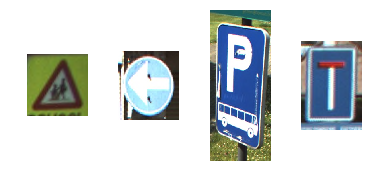

In [15]:
#Now, we are going to make a list with 4 random numbers. These will be used to select traffic signs from 
#the images array that you have just inspected in the previous section. 
#In this case, we use 300, 2250, 3650 and 4000 to plot 4 random images

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]
#To plot only a img with plt.imgshow(image)
# plt.imshow(images[400])

# Fill out the subplots with the random images that we defined 
for i in range(len(traffic_signs)):
#   To generate area to plot in each iterations
    plt.subplot(1, 4, i+1)
    #To show axis in each image(option on or off)
    plt.axis('off')
    #To plot image as image using imshow(image)
    plt.imshow(images[traffic_signs[i]])
#   the amount of width reserved for space between subplots,
#   expressed as a fraction of the average axis width
    plt.subplots_adjust(wspace=0.5)


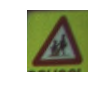

shape: (62, 61, 3), min: 3, max: 160


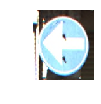

shape: (110, 96, 3), min: 3, max: 255


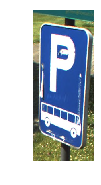

shape: (379, 153, 3), min: 0, max: 255


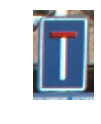

shape: (100, 68, 3), min: 17, max: 255


In [16]:
# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))